<a href="https://colab.research.google.com/github/novoforce/Exploring-Tensorflow/blob/main/Edurekha_tf_course/Certification_project1_face_mask_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the dataset

In [1]:
mkdir dataset

In [2]:
cd dataset

/content/dataset


In [ ]:
!gdown --id 1Mb5Qwx8F6n6XkkGirxuXMAScvFdeITQi

In [ ]:
!unzip /content/dataset/with_mask-20211103T190459Z-001.zip -d /content/dataset/

In [ ]:
!gdown --id 1Ln1XPgqne1X1giqPOTZfQ3gZE4CEGt63

In [ ]:
!unzip /content/dataset/without_mask-20211103T185920Z-001.zip -d /content/dataset/

# Importing Libraries

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet_v2 import MobileNetV2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Pre-processing the dataset

In [8]:
from imutils import paths
with_mask= [img for img in paths.list_images('/content/dataset/with_mask')]
without_mask= [img for img in paths.list_images('/content/dataset/without_mask')]
len(with_mask) + len(without_mask)

1376

In [16]:
image_size= (64,64)
batch_size= 32
epochs= 30

In [21]:
DATA_DIR= '/content/dataset'
train_datagen=ImageDataGenerator(rescale=1. /255,horizontal_flip =True,validation_split=0.2,featurewise_center=True,
    featurewise_std_normalization=True)
train_generator = train_datagen.flow_from_directory(
        directory=DATA_DIR,
        target_size=image_size,
        batch_size=batch_size,
        subset='training',
        classes=['with_mask','without_mask'],
        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        directory=DATA_DIR,
        target_size=image_size,
        batch_size=batch_size,
        subset='validation',
        classes=['with_mask','without_mask'],
        class_mode='categorical')

Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


# Visualize the dataset

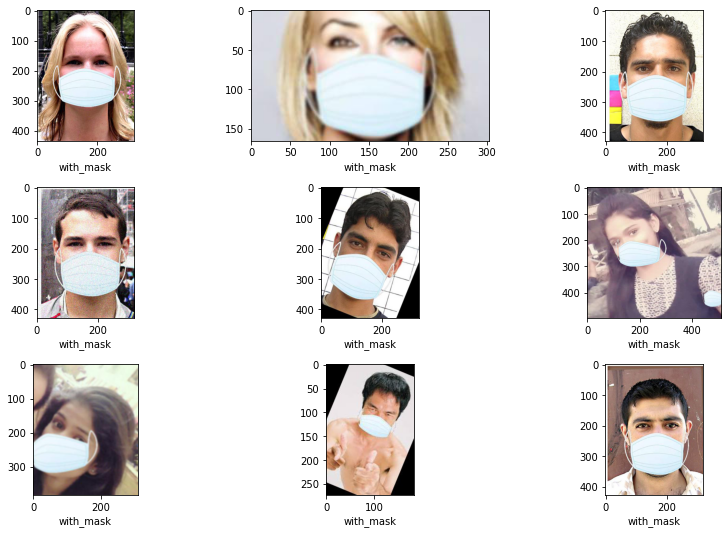

In [10]:
plt.figure(figsize=(12, 12))
for i in range(0,9):
    plt.subplot(5, 3, i+1)
    image = mpimg.imread(with_mask[i])
    plt.imshow(image) #'image_list' is the list of images
    plt.xlabel("with_mask") # 'labels' is the list of labels
plt.tight_layout()
plt.show()

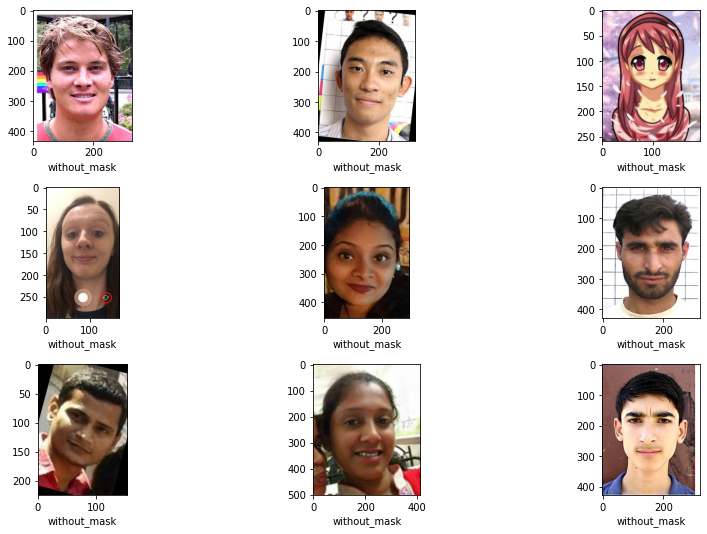

In [11]:
plt.figure(figsize=(12, 12))
for i in range(0,9):
    plt.subplot(5, 3, i+1)
    image = mpimg.imread(without_mask[i])
    plt.imshow(image) #'image_list' is the list of images
    plt.xlabel("without_mask") # 'labels' is the list of labels
plt.tight_layout()
plt.show()

# Designing the Model

In [26]:
classifier = MobileNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=image_size + (3,), pooling=None, classes=2)

9420800/9406464 [==============================] - 0s 0us/step


In [32]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalMaxPooling2D,BatchNormalization,Dense
print('no of layers:> ',len(classifier.layers))

layer_list = [layers.name for layers in classifier.layers]

for layers in classifier.layers:
    layers.trainable = False

last_layer = classifier.get_layer('out_relu') #final layer
last_output = last_layer.output

x = GlobalMaxPooling2D()(last_output)
x = BatchNormalization()(x)

x = Dense(1, activation="sigmoid", name="pred")(x)
classifier = Model(classifier.input, x)

no of layers:>  154


In [33]:
classifier.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 32, 32, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 32, 32, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 32, 32, 32)   0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [36]:
classifier.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
history= classifier.fit(train_generator, steps_per_epoch=train_generator.samples//batch_size, epochs=epochs, validation_data=validation_generator, validation_steps=validation_generator.samples//batch_size)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
34/34 [==============================] - 9s 179ms/step - loss: 0.3430 - accuracy: 0.8410 - val_loss: 0.2237 - val_accuracy: 0.8906
Epoch 2/30
34/34 [==============================] - 5s 152ms/step - loss: 0.2034 - accuracy: 0.9186 - val_loss: 0.1887 - val_accuracy: 0.9277
Epoch 3/30
34/34 [==============================] - 5s 150ms/step - loss: 0.1593 - accuracy: 0.9364 - val_loss: 0.1768 - val_accuracy: 0.9180
Epoch 4/30
34/34 [==============================] - 5s 150ms/step - loss: 0.1194 - accuracy: 0.9602 - val_loss: 0.1594 - val_accuracy: 0.9316
Epoch 5/30
34/34 [==============================] - 5s 152ms/step - loss: 0.1009 - accuracy: 0.9649 - val_loss: 0.1426 - val_accuracy: 0.9473
Epoch 6/30
34/34 [==============================] - 5s 150ms/step - loss: 0.0938 - accuracy: 0.9668 - val_loss: 0.1660 - val_accuracy: 0.9336
Epoch 7/30
34/34 [==============================] - 5s 149ms/step - loss: 0.0875 - accuracy: 0.9705 - val_loss: 0.1790 - val_accuracy: 0.9277
Epoch 

# Evaluating the model

In [38]:
classifier.evaluate(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


9/9 [==============================] - 1s 131ms/step - loss: 0.1800 - accuracy: 0.9327


[0.1800331026315689, 0.9327272772789001]

In [40]:
classifier.save("mask_detector_model_weights.h5")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


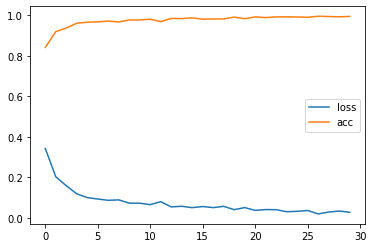

In [39]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['accuracy'])
plt.legend(['loss', 'acc'])
plt.savefig("learning-gender.png")
plt.show()
plt.close()

# Inferencing 

In [56]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/dataset/with_mask/1-with-mask.jpg",target_size=(64,64))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = classifier.predict(img_pred)
print(result)

[[9.9999988e-01 6.8136366e-08]]


In [57]:
idxs= np.argsort(result)[0][::-1][0]
print(idxs)

0


In [58]:
print(validation_generator.class_indices.items())

CLASSES= dict([(value,key) for key,value in validation_generator.class_indices.items()])
print(CLASSES)

dict_items([('with_mask', 0), ('without_mask', 1)])
{0: 'with_mask', 1: 'without_mask'}


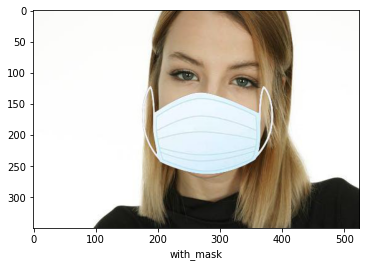

In [59]:
img=mpimg.imread('/content/dataset/with_mask/1-with-mask.jpg')
imgplot = plt.imshow(img)
plt.xlabel(CLASSES[idxs])
plt.show()